<Figure size 600x500 with 0 Axes>

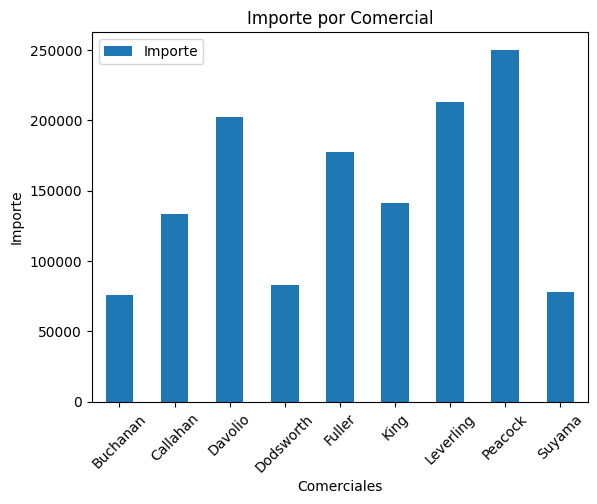

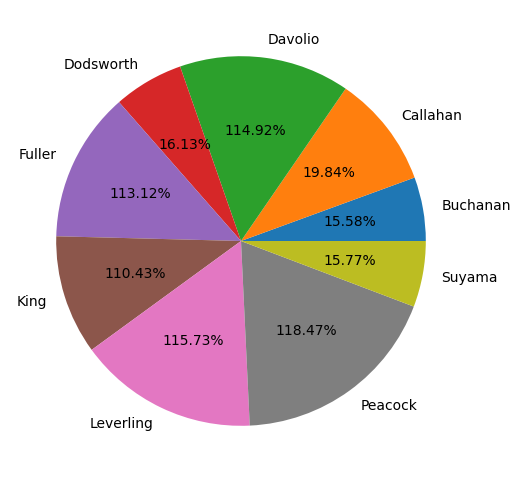

<Figure size 1000x500 with 0 Axes>

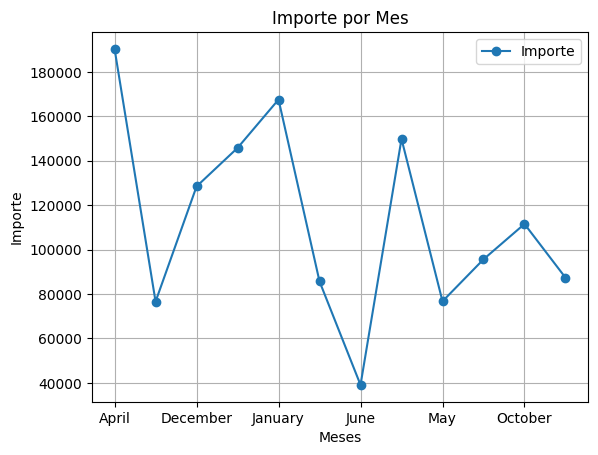

<Figure size 640x480 with 0 Axes>

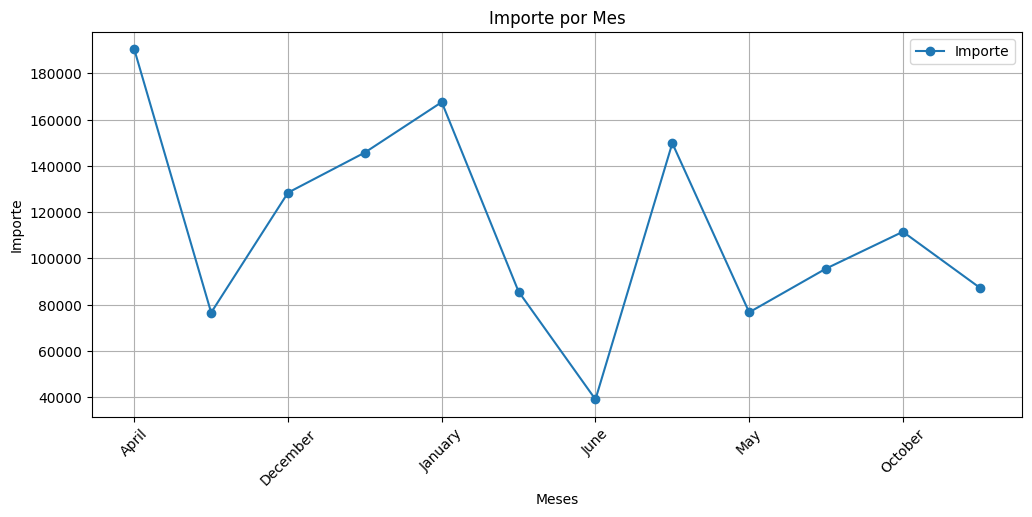

array(['Davolio', 'Peacock', 'Suyama', 'Callahan', 'King', 'Leverling',
       'Buchanan', 'Dodsworth', 'Fuller'], dtype=object)

In [34]:
#Vamos a cargar el Excel Datos Pedidos.xlsx
import pandas as pd


pedidos = pd.read_excel("/Users/rogerdefez/Documents/VSCWorkspace/Data-Science-Project/Datos para ejercicios/Datos Pedidos.xlsx", sheet_name="Datos")
pedidos_comercial = pedidos.groupby('Comercial').Importe.sum()
pedidos_comercial = pd.DataFrame(pedidos_comercial, 
                                 columns=["Importe"]).reset_index()
pedidos_comercial
#Con la libreria matplotlib
#py -3.13 -m pip install matplotlib
import matplotlib.pyplot as plt
#Tenemos que reservar espacio en el kernel (figure)
plt.figure(figsize=(6,5))
#bar = grafico de columnas
pedidos_comercial.plot(kind='bar',x='Comercial',y='Importe')
plt.title("Importe por Comercial")
plt.xlabel("Comerciales")
plt.ylabel("Importe")
plt.xticks(rotation=45)
plt.show()
#Un grafico circular con pie
plt.figure(figsize=(6,6))
#pedidos_comercial.plot(kind='pie',labels=pedidos_comercial['Comercial'],y='Importe')
#Vamos a darle el %, usaremo autopct = '1%.2f%%'
plt.pie(pedidos_comercial["Importe"], labels=pedidos_comercial['Comercial'],
        autopct='1%.2f%%')
plt.show()
#Un grafico de lineas, para ello del dataframe calcularemos el mes
#Convertir una columna en datetime, primero usaremos to_datetime y 
# usaremos usaremos el accesor dt
pedidos['Fecha de Pedido'] = pd.to_datetime(pedidos['Fecha de Pedido'])
#Para averiguar el mes
pedidos['Mes'] = pedidos['Fecha de Pedido'].dt.month
#Para averiguar el año
pedidos['Año'] = pedidos['Fecha de Pedido'].dt.year
#Para averiguar el dia
pedidos['Dia'] = pedidos['Fecha de Pedido'].dt.day
#Dia de la semana del 0 al 6, seria con dt.dayofweek
#La semana del año isocalendar
pedidos['Semana'] = pedidos['Fecha de Pedido'].dt.strftime('%W')
pedidos
# EL mes en letras
pedidos['Mes Letras'] = pedidos['Fecha de Pedido'].dt.strftime('%B')
#Agrupamos por mes y sumamos el importe, para ello usamos groupby
# y luego sumamos el importe
pedidos_Mes = pedidos.groupby('Mes Letras').Importe.sum()
# Este es un objeto Series, lo convertimos a DataFrame
pedidos_Mes = pd.DataFrame(pedidos_Mes).reset_index()
# Vamos a imprimir el grafico de lineas line
plt.figure(figsize=(10,5))
pedidos_Mes.plot(kind='line', x='Mes Letras', y='Importe', marker='o')
plt.title("Importe por Mes")   
plt.grid(True)  #Rejilla en la parte postrerior
plt.xlabel("Meses")
plt.ylabel("Importe") 
plt.show()  
#VAmos a ordenar los meses mediante diccionario
orden_meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4,
    'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8,
    'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}
pedidos_Mes['Mes Orden'] = pedidos_Mes['Mes Letras'].map(orden_meses)
pedidos_Mes = pedidos_Mes.sort_values(by='Mes Orden')
# Ahora vamos a imprimir el grafico de lineas
plt.figure()
pedidos_Mes.plot(kind='line', x='Mes Letras', y='Importe', marker='o', figsize=(12,5))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.title("Importe por Mes")    
plt.grid(True)  #Rejilla en la parte postrerior
plt.xlabel("Meses")
plt.ylabel("Importe")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.show()

# Como ver los valores unicos.... Los diferentes valores de una columna  .unique()
pedidos['Ciudad'].unique()
pedidos['Comercial'].unique()




#### PRACTICA 35
Cargar el fichero de Datos_Pedidos.xlsx , agregar una columna nueva que contenga el mes en letras
y otra que contenga el número de mes. Crear un gráfico circular para ver la suma de Cantidad por mes en letras ( en castellano y en orden cronologico)

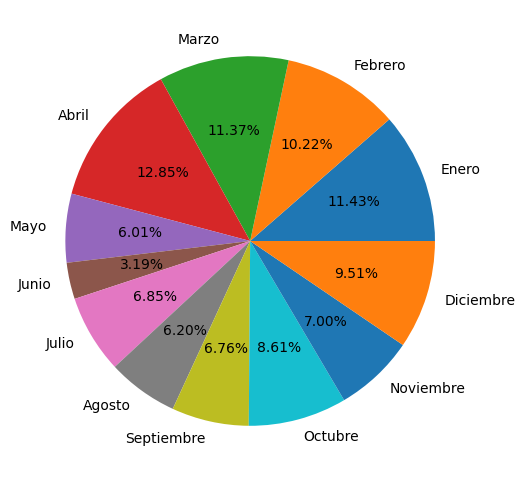

In [21]:
import pandas as pd
# Vamos a cargar el Excel Datos Pedidos.xlsx
Datos_pedidos = pd.read_excel("/Users/rogerdefez/Documents/VSCWorkspace/Data-Science-Project/Datos para ejercicios/Datos Pedidos.xlsx", sheet_name="Datos")
# Vamos a ver los datos
Datos_pedidos.head()
#agregar una columna nueva que contenga el mes en letras
#y otra que contenga el número de mes.
# Convertir la columna 'Fecha de Pedido' a tipo datetime
Datos_pedidos['Fecha de Pedido'] = pd.to_datetime(Datos_pedidos['Fecha de Pedido'])
# Extraer el mes en letras
Datos_pedidos['Mes Letras'] = Datos_pedidos['Fecha de Pedido'].dt.strftime('%B')
# Extraer el número de mes
Datos_pedidos['Mes Numero'] = Datos_pedidos['Fecha de Pedido'].dt.strftime('%m')
#Voy a un metodo del accesor para convertir el texto en ingles al castellano
import locale
Datos_pedidos['Mes Letras'] = Datos_pedidos['Fecha de Pedido'].dt.month_name(locale='es_ES.UTF-8')
#Hacemos Agrupaciobn
Datos_pedidos_group = Datos_pedidos.groupby(['Mes Numero', 'Mes Letras']).Cantidad.sum()
Datos_pedidos_group = pd.DataFrame(Datos_pedidos_group).reset_index()

#El Grafico
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(Datos_pedidos_group['Cantidad'],
        labels=Datos_pedidos_group['Mes Letras'],
        autopct='%.2f%%')

plt.show()




##### PRACTICA 36
Del mismo Dataframe resultante ver solamente los primeros 10 registros del mes de Diciembre

In [12]:
Datos_pedidos[Datos_pedidos['Fecha de Pedido'].dt.month == 12].sort_values(ascending=True, by='Fecha de Pedido').head(10)

,Fecha de Pedido,Fecha de Entrega,Tiempo,Cliente,Ciudad,Region,Pais,Comercial,Transportista,Producto,Precio/Unidad,Cantidad,Categoria,Subcategorias,Proveedor,Importe,Mes Letras
1027,1996-12-02,1996-12-30,28,Split Rail Beer & Ale,Lander,WY,Estados Unidos,Callahan,United Package,Gnocchi de la abuela Alicia,30.4,18,Granos/Cereales,NaN,Pasta Buttini s.r.l.,547.2,December
451,1996-12-02,1996-12-30,28,Split Rail Beer & Ale,Lander,WY,Estados Unidos,Callahan,United Package,Salchicha Thüringer,99.0,20,Carnes,Salchichas,Plutzer Lebensmittelgroßmärkte AG,1980.0,December
5,1996-12-03,1996-12-31,28,Chop-suey Chinese,Bern,NaN,Suiza,Suyama,United Package,Té Dharamsala,14.4,15,Bebidas,Cafes-Tes,Exotic Liquids,216.0,December
1098,1996-12-03,1996-12-31,28,Chop-suey Chinese,Bern,NaN,Suiza,Suyama,United Package,Bollos de pan de Wimmer,26.6,30,Granos/Cereales,NaN,Plutzer Lebensmittelgroßmärkte AG,798.0,December
918,1996-12-03,1996-12-31,28,Chop-suey Chinese,Bern,NaN,Suiza,Suyama,United Package,Queso de soja Longlife,8.0,20,Frutas/Verduras,NaN,Tokyo Traders,160.0,December
1630,1996-12-03,1996-12-31,28,La maison d'Asie,Toulouse,NaN,Francia,Davolio,Speedy Express,Escabeche de arenque,15.2,6,Pescado/Marisco,NaN,Svensk Sjöföda AB,91.2,December
1336,1996-12-04,1997-01-01,28,Queen Cozinha,São Paulo,SP,Brasil,Buchanan,United Package,Camembert Pierrot,27.2,70,Lácteos,NaN,Gai pâturage,1904.0,December
1463,1996-12-04,1997-01-01,28,Queen Cozinha,São Paulo,SP,Brasil,Buchanan,United Package,Queso Mozzarella Giovanni,27.8,42,Lácteos,NaN,Formaggi Fortini s.r.l.,1167.6,December
1904,1996-12-04,1997-01-01,28,Queen Cozinha,São Paulo,SP,Brasil,Buchanan,United Package,Mermelada de Sir Rodney's,64.8,12,Repostería,NaN,"Specialty Biscuits, Ltd.",777.6,December
192,1996-12-04,1997-01-01,28,Queen Cozinha,São Paulo,SP,Brasil,Buchanan,United Package,Vino Côte de Blaye,210.8,40,Bebidas,Vinos,Aux joyeux ecclésiastiques,8432.0,December


###### PRACTICA 37
DEL MISMO DATAFRAME Datos_Pedidos.xlsx , Ver los clientes únicos que compraron en febrero del 97

In [25]:

F021997 = (Datos_pedidos['Fecha de Pedido'].dt.month==2) & (Datos_pedidos['Fecha de Pedido'].dt.year==1997)
Datos_pedidos['Cliente'][F021997].unique()


array(['Consolidated Holdings', 'Save-a-lot Markets',
       'Toms Spezialitäten', 'Berglunds snabbköp', 'Wartian Herkku',
       'Suprêmes délices', 'Around the Horn', 'Blondel père et fils',
       'Folk och fä HB', 'Ernst Handel', 'Victuailles en stock',
       'QUICK-Stop', 'LILA-Supermercado', 'Ricardo Adocicados',
       'Reggiani Caseifici', 'Mère Paillarde', 'Princesa Isabel Vinhos',
       "La maison d'Asie", 'Königlich Essen', 'Rancho grande',
       'Old World Delicatessen'], dtype=object)

###### PRACTICA 38
DEL MISMO DATAFRAME Datos_Pedidos.xlsx , crear una columna que contenga la diferencia de días entre que el cliente hace el pedido y la empresa hace la entrega, con esta columna ver los 3 comerciales que más rapido van entregando los pedidos

In [28]:
# Fecha de entrega tambien tiene que ser datetime
Datos_pedidos['Fecha de Entrega'] = pd.to_datetime(Datos_pedidos['Fecha de Entrega'])
# Calcular la diferencia en días entre 'Fecha de Pedido' y 'Fecha de Entrega'
# Si hago una operacion con 2 DAtetime el resultado tambien puede llamar a metodos de datetime
Datos_pedidos['Diferencia Dias'] = (Datos_pedidos['Fecha de Entrega'] - Datos_pedidos['Fecha de Pedido']).dt.days
Datos_pedidos
# Agrupar por 'Comercial' y calcular la media de 'Diferencia Dias'
comerciales = Datos_pedidos.groupby('Comercial')['Diferencia Dias'].mean()
comerciales = pd.DataFrame(comerciales).reset_index()
comerciales.sort_values(ascending=True, by='Diferencia Dias', ignore_index=True).head(3)

,Comercial,Diferencia Dias
0,Peacock,27.033333
1,Leverling,27.389408
2,Davolio,27.391304


###### PRACTICA 39
DEL MISMO DATAFRAME Datos_Pedidos.xlsx  Ver un gráfico circular con la suma de importe por comencial de los 3 que más venden y por otro lado el resto. Ej : El comercial 1 vende un 15 % el 2 un 13% el 3 un 10% resto comerciales 62% 

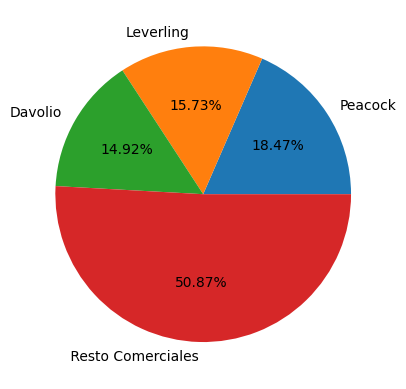

In [ ]:
#Agrupar por comercial y sumar el importe
Datos_pedidos_Comercial = Datos_pedidos.groupby('Comercial')['Importe'].sum()
Datos_pedidos_Comercial = pd.DataFrame(Datos_pedidos_Comercial).reset_index()
Datos_pedidos_Comercial.sort_values(ascending=False, by='Importe', ignore_index=True).head(3)
#Calcular el importe del resto de comerciales
#Voy a dividir el Dataframe en 2 partes, una con los 3 primeros y otra con el resto
Datos_pedidos_Comercial1 = Datos_pedidos_Comercial.nlargest(3, 'Importe')
#Sumar el resto de comerciales
Datos_pedidos_Comercial2 =  Datos_pedidos_Comercial.nsmallest(len(Datos_pedidos_Comercial)-3, 'Importe')
Importe_Resto = Datos_pedidos_Comercial2['Importe'].sum()
# Creamos un dataframe con la suma del resto de ciales 
Datos_Pedidos_Resto = pd.DataFrame([{'Comercial' : ' Resto Comerciales', 'Importe': Importe_Resto}])
#Voy a anexar los 2 dataframes o concatenar
Datos_Pedidos_Final = pd.concat([Datos_pedidos_Comercial1, Datos_Pedidos_Resto], ignore_index=True)
# Imprimir el resultado final
Datos_Pedidos_Final
plt.pie(Datos_Pedidos_Final['Importe'],
        labels=Datos_Pedidos_Final['Comercial'],
        autopct='%.2f%%')
plt.show()